# Problem set #2
### by Alexander Tyan, January 22, 2018

## 1).

In [7]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integrate
%matplotlib notebook

pts = np.loadtxt('incomes.txt')

### a). Plot a histogram of percentages of the income.txt data with 30 bins. Make sure that the bins are weighted using the normed=True option. Make sure your plot has correct x-axis and y-axis labels as well as a plot title.

<IPython.core.display.Javascript object>


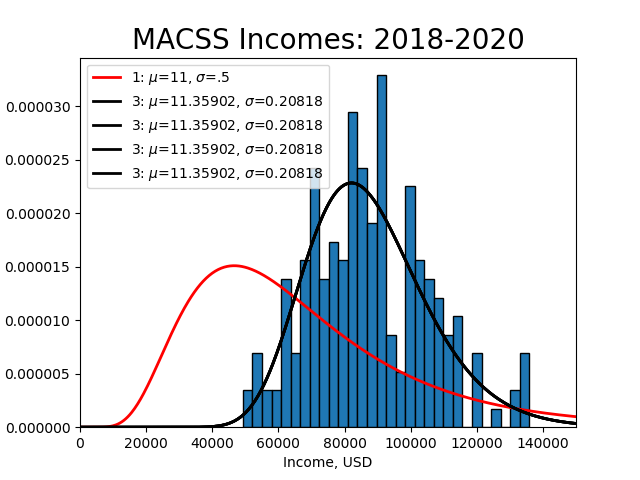

(0, 150000)

In [8]:
count, bins, ignored = plt.hist(pts, bins=30, edgecolor='black', normed=True)
plt.title('MACSS Incomes: 2018-2020', fontsize=20)
plt.xlabel('Income, USD')
plt.ylabel('Proportion of Income') # Not sure why y-axis label is not showing up (?)
plt.xlim([0, 150000]) 

### b). Plot the lognormal PDF f(xj = 11:0;  = 0:5) for 0  x  150; 000. What is the value of the log likelihood value for this parameterization of the distribution and given this data?

In [9]:
def lognormal_pdf(xvals, mu, sigma):
    """
    Generates a vector of values from a lognormal distribution.
    Inputs:
        xvals: Numpy array, vector of x-values
        mu: Integer mean
        sigma: Integer standard deviation
    Returns:
        pdf_vals: Numpy array, vector of y-values, i.e. pdf-values.
    """
    pdf_vals = ( 1 / 
           (xvals * sigma * np.sqrt(2 * np.pi))) * np.exp( (- (np.log(xvals) - mu) ** 2) / (2 * (sigma ** 2)))
    return pdf_vals

In [10]:
# Plot the lognormal PDF:
dist_pts = np.linspace(0.00000001, 150000, 500)
mu_1 = 11
sig_1 = .5

plt.plot(dist_pts, lognormal_pdf(dist_pts, mu_1, sig_1),
         linewidth=2, color='r', label='1: $\mu$=11, $\sigma$=.5')
plt.legend(loc='upper left')

#### See earler plot ^

In [11]:
def log_lik_lognormal(xvals, mu, sigma):
    """
    Log likelihood function for a lognormal disgribution.
    Inputs:
        xvals: Numpy array, our data
        mu: float, mean
        sigma: float, s.d.
    Returns:
        Log likelihood function value
    """
    pdf_vals = lognormal_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

# Log likelihood value for this parameterization of the distribution and given this data:
print('Log-likelihood for mean=11 and sd=.5:', log_lik_lognormal(pts, mu_1, sig_1))

Log-likelihood for mean=11 and sd=.5: -2385.85699781


### c). Estimate the parameters of the lognormal distribution by maximum likelihood and plot its PDF against the PDF from part (b) and the histogram from part (a). Plot the estimated PDF for 0  x  150; 000. Report the ML estimates for  and , the value of the likelihood function, and the variance-covariance matrix.

In [12]:
def crit(params, *args):
    """
    Criterion function for minimization.
    Inputs:
        params: tuple of mean and sd
        *args: observation values
    Returns:
        negative value of log likelihood function
    """
    mu, sigma = params
    xvals, = args
    log_lik_val = log_lik_lognormal(xvals, mu, sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [22]:
mu_init = 11.4  # mu_2
sig_init = .2  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = (pts, )

# Estimate the parameters of the lognormal distribution by maximum likelihood:
results = opt.minimize(crit, params_init, args=(mle_args), method='L-BFGS-B',
                       bounds=((1e-10, None), (1e-10, None)))
mu_MLE, sig_MLE = results.x
print('mu_MLE =', mu_MLE, ' sig_MLE=', sig_MLE)
print('Log-likelihood for mean={} and sd={}:'.format(mu_MLE, sig_MLE), log_lik_lognormal(pts, mu_MLE, sig_MLE))

mu_MLE = 11.3590229824  sig_MLE= 0.208177310227
Log-likelihood for mean=11.359022982358669 and sd=0.2081773102269182: -2241.71930136


In [23]:
#plot its PDF against the PDF from part (b) and the histogram from part (a)
plt.plot(dist_pts, lognormal_pdf(dist_pts, mu_MLE, sig_MLE),
         linewidth=2, color='k', label='3: $\mu$={:0.5f}, $\sigma$={:0.5f}'.format(mu_MLE, sig_MLE))
plt.legend(loc='upper left')

In [24]:
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = \n', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) = 
 [[ 0.00029346 -0.00011036]
 [-0.00011036  0.00026702]]
Standard error for mu estimate =  0.0171307854076
Standard error for sigma estimate =  0.0163406151292


#### Report the ML estimates for mu and sigma, the value of the likelihood function, and the variance-covariance matrix: 
#### mu_MLE = 11.3590229824  sig_MLE= 0.208177310227
#### Log likelihood value for this parameterization of the distribution and given this data: -2385.85699781

#### VCV(MLE) = 
#### [[ 0.00029346 -0.00011036]
#### [-0.00011036  0.00026702]]
#### Standard error for mu estimate =  0.0171307854076
#### Standard error for sigma estimate =  0.0163406151292

### d). Perform a likelihood ratio test to determine the probability that the data in incomes.txt came from the distribution in part (b).

In [30]:
log_lik_h0 = log_lik_lognormal(pts, mu_1, sig_1)
log_lik_mle = log_lik_lognormal(pts, mu_MLE, sig_MLE)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


#### Low p-value of 0.0 => We reject the null hypothesis that mu = 11 and sigma = 0.5

### e). With your estimated distribution of incomes for Chicago MACSS students from part (c), you now have a model for what your own income might look like when you graduate. Using that estimated model from part (c), What is the probability that you will earn more than USD100,000? What is the probability that you will earn less than USD75,000?

In [31]:
def integrand(x, a, b):
    return a*x**2 + b
prob_more_than_100k = 1 - integrate.quad(lognormal_pdf, 0, 100000, args=(mu_MLE, sig_MLE))[0]
print("Probability of earning more than $100000 = {}".format(prob_more_than_100k))

prob_more_less_75k = integrate.quad(lognormal_pdf, 0, 75000, args=(mu_MLE, sig_MLE))[0]
print("Probability of earning less than $75000 = {}".format(prob_more_less_75k))

Probability of earning more than $100000 = 0.22986680316750885
Probability of earning less than $75000 = 0.26023428064476156


#### Probability of earning more than USD100000 = 0.22986680316750885 
#### Probability of earning less than USD75000 = 0.26023428064476156

## 2).

### (a). Estimate (0; 1; 2; 3; 2) to maximize the likelihood of seeing the data in sick.txt. Report your estimates, the value of the log likelihood function, and the estimated variance covariance matrix of the estimates.

In [32]:
pts2 = np.genfromtxt("sick.txt", dtype=float, delimiter=',', names=True) 
#a, b, c, d = np.loadtxt('sick.txt', delimiter=',', skiprows=1, unpack=True)
sick_vec = pts2["sick"]
age_vec = pts2["age"]
children_vec = pts2["children"]
temp_vec = pts2["avgtemp_winter"]


In [33]:
def normal_pdf(xvals, mu, sigma):
    """
    PDF Function
    Inputs:
        mu: float, mean
        sigma: float, s.d.
    Returns:
        pdf_vals: Numpy array of PDF function values
    """
    pdf_vals = (1 / (np.sqrt(2 * np.pi * sigma**2))) * \
    (np.exp( -(xvals - mu)**2 / (2 * sigma**2)))
    
    return pdf_vals

In [34]:
def log_lik_norm(xvals, mu, sigma):
    """
    Log likelihood function for normal distribution
    Inputs:
        mu: float, mean
        sigma: float, s.d.
    Returns:
        log_lik_val: Numpy array of Log likelihood function values
    
    """
    pdf_vals = normal_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val


In [35]:
def crit(params, *args):
    """
    Criterion function to use for minimization
    Inputs:
        params: tuple, beta coefficients and s.d.
        *args: tuple, availible data arrays for sick, age, childre, temp variables
    Returns:
        neg_log_lik_val: negative log likelihood value
    
    """
    beta_0, beta_1, beta_2, beta_3, sigma = params
    sick, age, children, temp = args
    xvals = sick_vec - beta_0 - beta_1 * age_vec - beta_2 * children_vec - beta_3 * temp_vec
    log_lik_val = log_lik_norm(xvals=xvals, mu=0, sigma=sigma)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

####  Estimates, the value of the log likelihood function, and the estimated variance covariance matrix of the estimates:

In [36]:
# Run MLE:
beta_0_init = 0
beta_1_init = 0  
beta_2_init = 0 
beta_3_init = 0
sigma_init = 1
params_init = np.array([beta_0_init, beta_1_init, beta_2_init, beta_3_init, sigma_init])
mle_args = (sick_vec, age_vec, children_vec, temp_vec)
results = opt.minimize(crit, params_init, args=(mle_args))

# Estimates from MLE:
beta_0_mle = results.x[0]
beta_1_mle = results.x[1]
beta_2_mle = results.x[2]
beta_3_mle = results.x[3]
sigma_mle = results.x[4]
print("beta_0 = {} \n \
    beta_1 = {} \n \
    beta_2 = {} \n \
    beta_3 = {} \n \
    sigma = {}".\
      format(beta_0_mle, beta_1_mle, beta_2_mle, beta_3_mle, sigma_mle))

# Log likelihood:
xvals_mle = sick_vec - beta_0_mle - beta_1_mle * age_vec - \
beta_2_mle * children_vec - beta_3_mle * temp_vec
print('Log-likelihood: ', log_lik_norm(xvals=xvals_mle, mu=0, sigma=sigma_mle))



# VCV Matrix:
OffDiagNeg = np.full((5, 5), -1)
np.fill_diagonal(OffDiagNeg, 1)
vcv_mle = results.hess_inv * OffDiagNeg
print('VCV(MLE) = \n', vcv_mle)

beta_0 = 0.25164680235321324 
     beta_1 = 0.012933384538433805 
     beta_2 = 0.40050172758097996 
     beta_3 = -0.009991700389035109 
     sigma = 0.0030177398012648207
Log-likelihood:  876.865046673
VCV(MLE) = 
 [[  8.98935192e-07  -1.17164060e-08   2.01746949e-07   2.27774925e-08
   -3.13773796e-09]
 [ -1.17164060e-08   3.89408030e-09   3.42815419e-08   2.55363176e-09
    1.13683786e-11]
 [  2.01746949e-07   3.42815419e-08   3.54881796e-07  -2.26823860e-08
    1.44212093e-09]
 [  2.27774925e-08   2.55363176e-09  -2.26823860e-08   2.01803483e-09
    2.66164034e-11]
 [ -3.13773796e-09   1.13683786e-11   1.44212093e-09   2.66164034e-11
    2.31256152e-08]]


/Users/alexander/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/Users/alexander/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Users/alexander/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


### b). Use a likelihood ratio test to determine the probability that 0 = 1:0, 2 = 0:01 and 1; 2; 3 = 0. That is, what is the likelihood that age, number of children, and average winter temperature have no effect on the number of sick days?

In [37]:
beta_0_h0 = 1
beta_1_h0 = 0  
beta_2_h0 = 0 
beta_3_h0 = 0
sigma_h0 = np.sqrt(.01)
xvals_h0 = sick_vec - beta_0_h0 - beta_1_h0 * age_vec - \
beta_2_h0 * beta_3_h0 - beta_3_mle * temp_vec

log_lik_h0 = log_lik_norm(xvals=xvals_h0, mu=0, sigma=sigma_h0)
log_lik_mle = log_lik_norm(xvals=xvals_mle, mu=0, sigma=sigma_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


#### Chi squared of H0 with 2 degrees of freedom p-value =  0.0 (the likelihood), so we can reject the null hypothesis because there is very little likelihood that age, number of children, and average winter have no effect on sick days. 